Dimensions of dataset: (4600, 18)

First 5 rows:
            date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02/05/14 0:00   313000.0         3       1.50         1340      7912   
1  02/05/14 0:00  2384000.0         5       2.50         3650      9050   
2  02/05/14 0:00   342000.0         3       2.00         1930     11947   
3  02/05/14 0:00   420000.0         3       2.25         2000      8030   
4  02/05/14 0:00   550000.0         4       2.50         1940     10500   

   floors waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5          0   0.0          3        1340              0      1955   
1     2.0          0   4.0          5        3370            280      1921   
2     1.0          0   0.0          4        1930              0      1966   
3     1.0          0   0.0          4        1000           1000      1963   
4     1.0          0   0.0          4        1140            800      1976   

   yr_renovated                

/tmp/ipython-input-2290539846.py:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


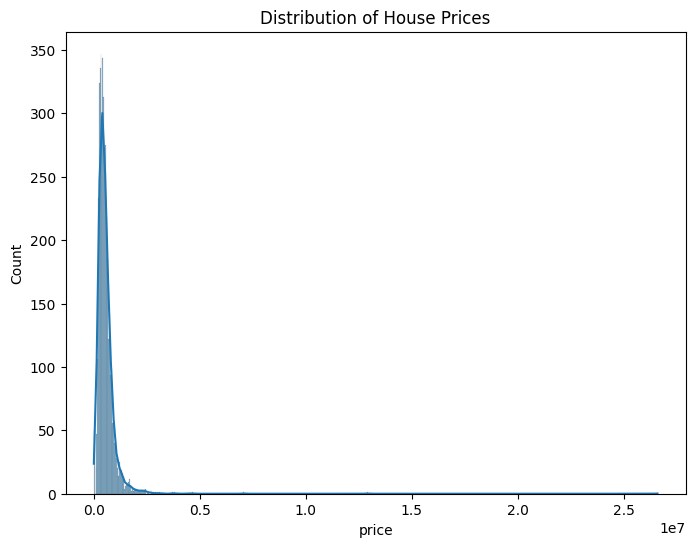

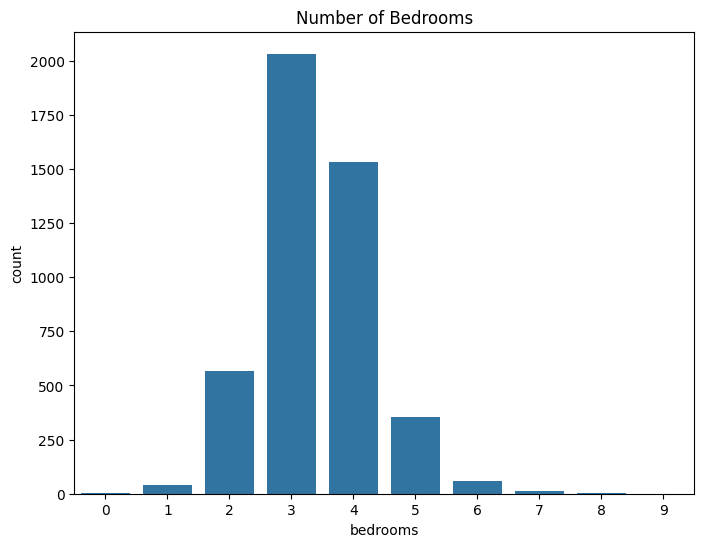

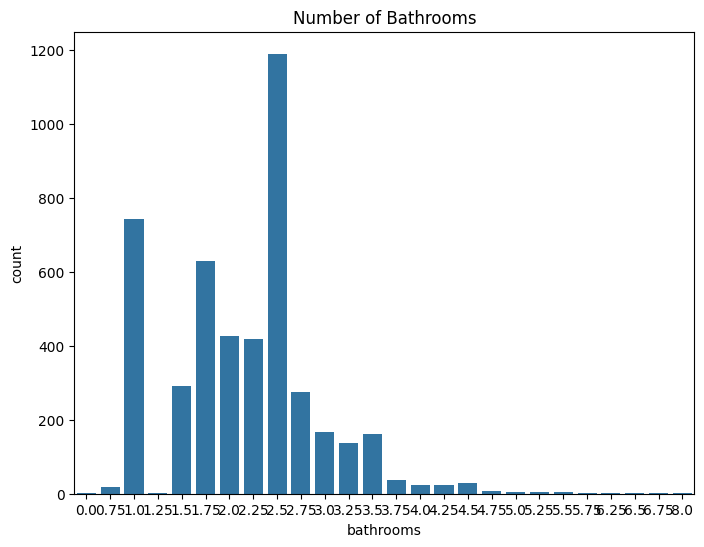

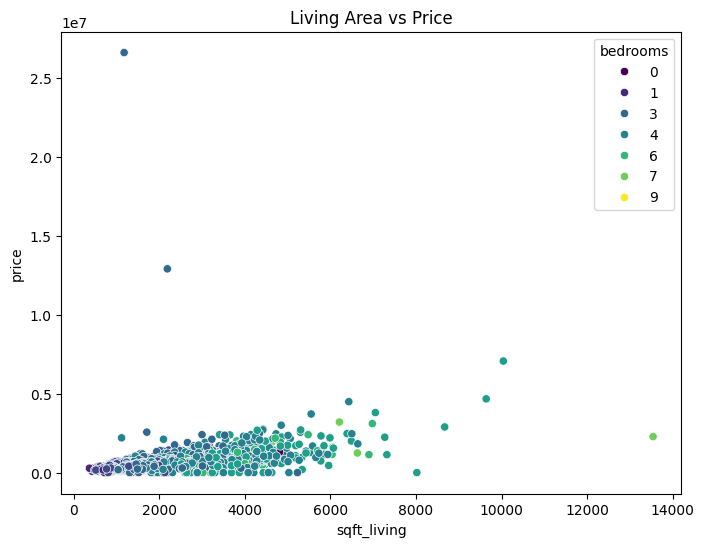

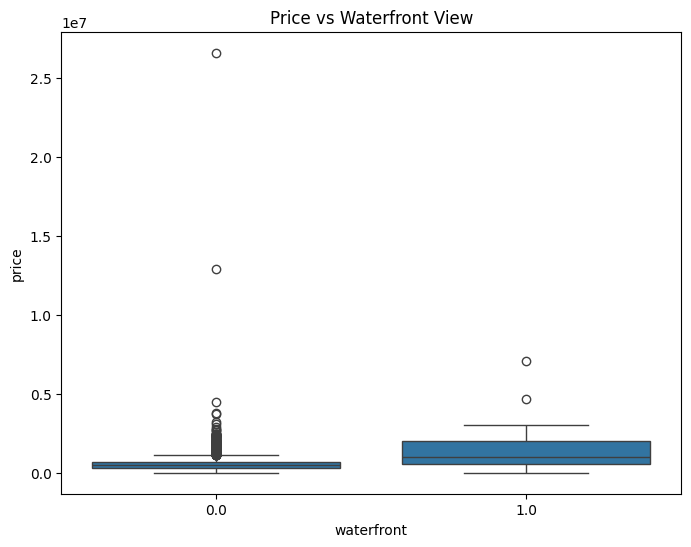

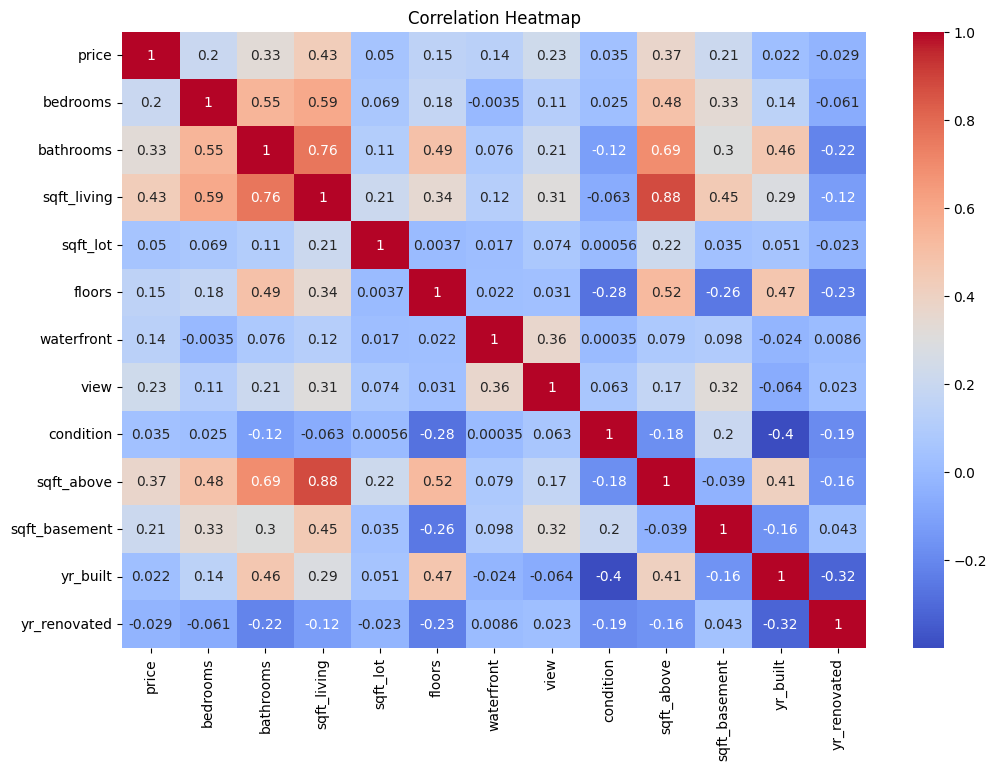

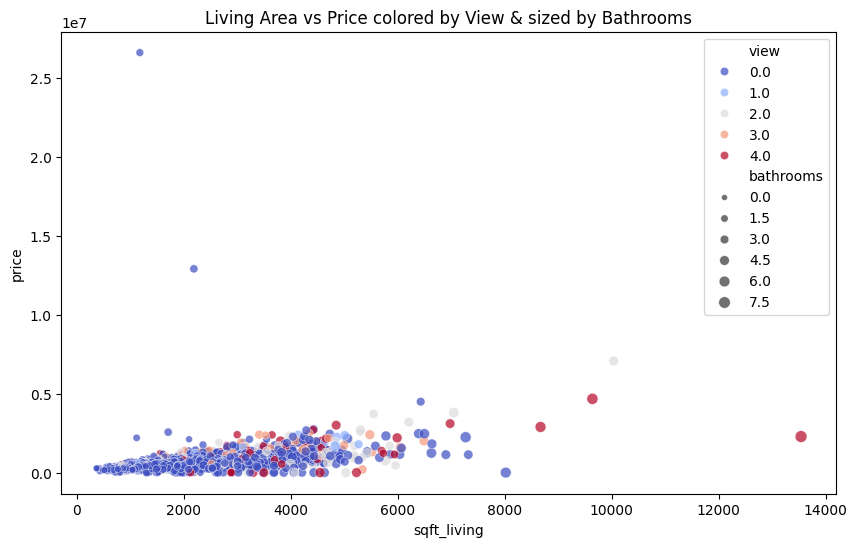

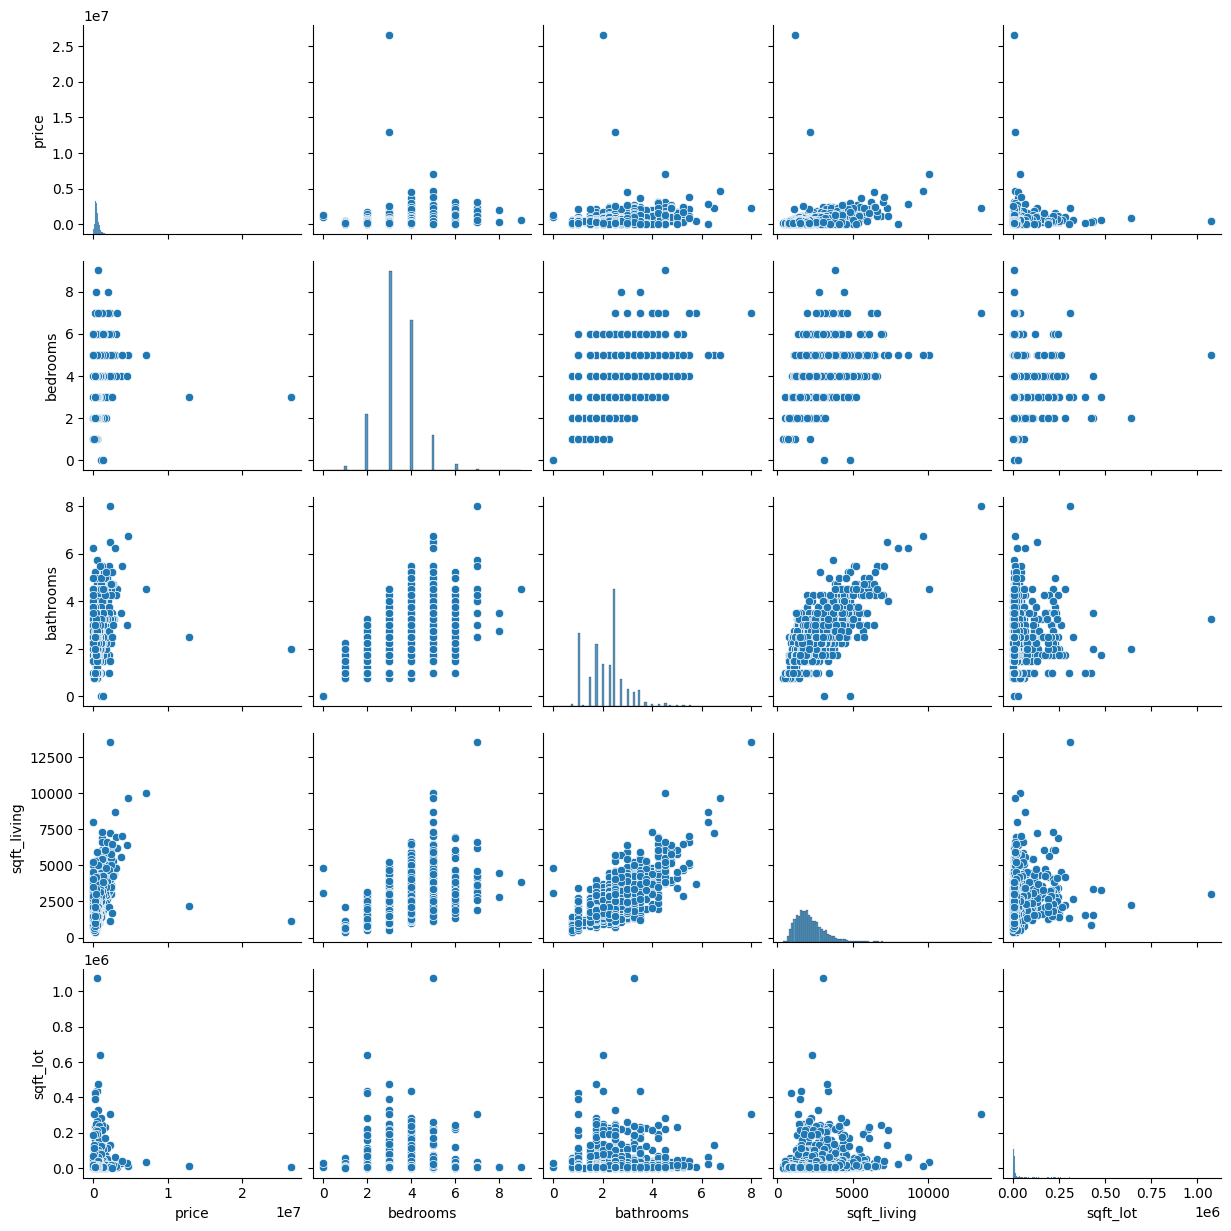

In [ ]:
# ========================
# Google Colab EDA Script
# ========================

# Install libraries
!pip install pandas matplotlib seaborn plotly

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ========================
# 1. Load the dataset
# ========================
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/house%20price.csv"
df = pd.read_csv(url)

# ========================
# 2. Initial Exploration
# ========================
print("Dimensions of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe(include='all'))

# ========================
# 3. Data Handling & Cleaning
# ========================

# Replace '?' with NaN
df.replace("?", np.nan, inplace=True)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert numeric-like columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass  # keep as object if conversion fails

# Fill NaNs: numeric with median, categorical with mode
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(exclude=[np.number, 'datetime']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop duplicates
df.drop_duplicates(inplace=True)

print("\nAfter Cleaning:")
print(df.isnull().sum())

# ========================
# 4. Univariate Analysis
# ========================
plt.figure(figsize=(8,6))
sns.histplot(df['price'], kde=True)
plt.title("Distribution of House Prices")
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', data=df)
plt.title("Number of Bedrooms")
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='bathrooms', data=df)
plt.title("Number of Bathrooms")
plt.show()

# ========================
# 5. Bivariate Analysis
# ========================
plt.figure(figsize=(8,6))
sns.scatterplot(x='sqft_living', y='price', hue='bedrooms', data=df, palette='viridis')
plt.title("Living Area vs Price")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title("Price vs Waterfront View")
plt.show()

# Correlation heatmap (numeric only)
plt.figure(figsize=(12,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ========================
# 6. Multivariate Analysis
# ========================
plt.figure(figsize=(10,6))
sns.scatterplot(x='sqft_living', y='price', hue='view', size='bathrooms', data=df, palette='coolwarm', alpha=0.7)
plt.title("Living Area vs Price colored by View & sized by Bathrooms")
plt.show()

# Interactive plot with Plotly
fig = px.scatter(df, x='sqft_living', y='price', color='bedrooms',
                 size='bathrooms', hover_data=['city', 'statezip'])
fig.update_layout(title="Interactive Price Analysis")
fig.show()

# Pairplot
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']])
plt.show()
